In [23]:
#Calculations dataframes for analysis of STAAR data.
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [24]:
#Import cleaned STAAR data for Grade 3, all students.
grade3all_df = pd.read_csv('../cleandata/AllStudentsGrade3.csv', header=0)
grade3all_df.head(3)

,CAMPUS,DNAME,CNAME,GRADE,District Type,School Site Street Address,School Site City,School Site Zip,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level
0,1902103,CAYUGA ISD,CAYUGA ELEM.,3,INDEPENDENT,17750 N US HWY 287,TENNESSEE COLONY,75861,6.0,40.0,38.0,27.0
1,1903102,ELKHART ISD,ELKHART INTERME,3,INDEPENDENT,301 E PARKER ST,ELKHART,75839-9701,26.0,68.0,37.0,12.0
2,1904102,FRANKSTON ISD,FRANKSTON ELEM.,3,INDEPENDENT,100 PERRY ST,FRANKSTON,75763-0428,16.0,39.0,26.0,10.0


In [25]:
#Set up a dataframe for calculating all of the means for each school. Assigned grading Below = 1, Approach = 2, 
#Meet = 3, Master = 4. Mean = #Students*Score for each category divided by #Students Total. 
grade3mean_df = grade3all_df[['CNAME', 
                              'District Type',
                              'Below Grade Level',
                              'Approach Grade Level',
                              'Meet Grade Level',
                              'Master Grade Level']]

grade3mean_df.head(3)

,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level
0,CAYUGA ELEM.,INDEPENDENT,6.0,40.0,38.0,27.0
1,ELKHART INTERME,INDEPENDENT,26.0,68.0,37.0,12.0
2,FRANKSTON ELEM.,INDEPENDENT,16.0,39.0,26.0,10.0


In [26]:
#Make total column for mean calculation
grade3mean_df['total'] = grade3mean_df.sum(axis=1)
grade3mean_df.head(3)

C:\Users\StevenJBark\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level,total
0,CAYUGA ELEM.,INDEPENDENT,6.0,40.0,38.0,27.0,111.0
1,ELKHART INTERME,INDEPENDENT,26.0,68.0,37.0,12.0,143.0
2,FRANKSTON ELEM.,INDEPENDENT,16.0,39.0,26.0,10.0,91.0


In [27]:
#Calculate mean and make new column
grade3mean_df['mean'] = (grade3mean_df['Below Grade Level']*1 +
                         grade3mean_df['Approach Grade Level']*2 +
                         grade3mean_df['Meet Grade Level']*3 +
                         grade3mean_df['Master Grade Level']*4) / grade3mean_df['total']

grade3mean_df

C:\Users\StevenJBark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level,total,mean
0,CAYUGA ELEM.,INDEPENDENT,6.0,40.0,38.0,27.0,111.0,2.774775
1,ELKHART INTERME,INDEPENDENT,26.0,68.0,37.0,12.0,143.0,2.244755
2,FRANKSTON ELEM.,INDEPENDENT,16.0,39.0,26.0,10.0,91.0,2.329670
3,NECHES ELEM.,INDEPENDENT,5.0,20.0,7.0,2.0,34.0,2.176471
4,SOUTHSIDE ELEM.,INDEPENDENT,46.0,174.0,93.0,51.0,364.0,2.409341
5,WESTWOOD ELEM.,INDEPENDENT,50.0,56.0,22.0,6.0,134.0,1.880597
6,SLOCUM PRE-K -,INDEPENDENT,5.0,22.0,13.0,5.0,45.0,2.400000
7,DEVONIAN ELEM.,INDEPENDENT,49.0,232.0,144.0,69.0,494.0,2.471660
8,SARAH STRINDEN,CHARTER,15.0,65.0,44.0,28.0,152.0,2.559211
9,W.H. BONNER ELE,INDEPENDENT,27.0,166.0,107.0,49.0,349.0,2.510029


In [28]:
#Null values in several rows of the data. CHECKED STATUS OF THESE ROWS:
#IN ALL CASES THESE ROWS WERE COMPLETELY EMPHTY AND WERE DELETED!

independent3 = grade3mean_df.loc[grade3mean_df['District Type'] == 'INDEPENDENT']
independent3.loc[independent3.isnull().any(axis=1)]

charter3 = grade3mean_df.loc[grade3mean_df['District Type'] == 'CHARTER']
charter3.loc[charter3.isnull().any(axis=1)]

,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level,total,mean
861,AZLEWAY - WILLO,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
954,NOVA ACAD. CEDA,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
1570,LA FE PREPARATO,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
1998,PHOENIX SCHOOL,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
4106,GEORGE M. KOZME,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
4107,TNC CAMPUS (TEX,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
4108,DEPELCHIN-RICHM,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
4109,LAUREL RIDGE,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
4110,OLYMPIA HILLS,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
4112,UT - UNIVERSITY,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN


In [29]:
#Delete empty rows from the independent and charter dataframes. Check using isnull().any() to confirm.
independent3 = independent3.dropna(how='any')
independent3.isnull().any()

charter3 = charter3.dropna(how='any')
charter3.isnull().any()

CNAME                   False
District Type           False
Below Grade Level       False
Approach Grade Level    False
Meet Grade Level        False
Master Grade Level      False
total                   False
mean                    False
dtype: bool

In [30]:
#Create vectors for independent and charter school means. Use independent2 and charter2 dataframes where null values were
#removed. Vectors are required for Box Plots.
I_vector3 = []
for index, row in independent3.iterrows():
    I_vector3.append(row[7])

C_vector3 = []
for index, row in charter3.iterrows():
    C_vector3.append(row[7])

In [31]:
#Check the I_vector and C_vector (These are actually just the vectors of the means for Independent and Charter schools)
[len(I_vector3), len(C_vector3)]

[4152, 351]

In [32]:
#Check Student's T test
from scipy import stats
(t, statp) = sp.stats.ttest_ind(I_vector3, C_vector3, equal_var=True)
statp3 = statp
statp3

3.484022814201602e-15

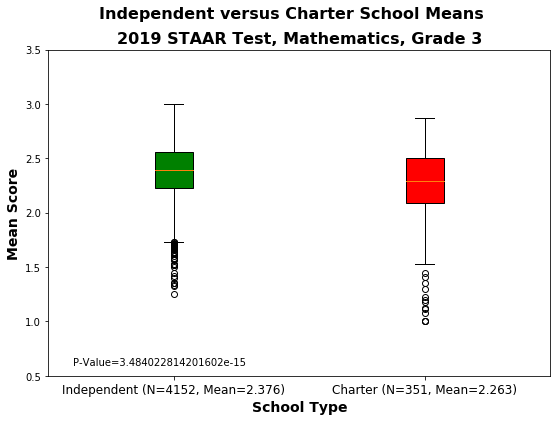

In [33]:
#Boxplot using the I_vector and C_vector generated above.
boxplot_dataI3 = [I_vector3] 
boxplot_dataC3 = [C_vector3]

plt.figure(figsize=(9,6))
plt.boxplot(boxplot_dataI3, positions=[1], patch_artist=True, boxprops=dict(facecolor='green'))
plt.boxplot(boxplot_dataC3, positions=[2], patch_artist=True, boxprops=dict(facecolor='red'))

plt.ylim(0.5, 3.5)

plt.suptitle('Independent versus Charter School Means', ha='center', fontsize=16, fontweight='bold')
plt.title('2019 STAAR Test, Mathematics, Grade 3', ha='center', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=14, fontweight='bold')
plt.ylabel('Mean Score', fontsize=14, fontweight='bold')
plt.xticks([1,2],['Independent (N=4152, Mean=2.376)', 'Charter (N=351, Mean=2.263)'], fontsize=12)
plt.text(0.6,0.6,f'P-Value={statp3}')

#Save figure
plt.savefig('../reports/BoxAllStudentsGrade3', dpi=300)

In [34]:
#Import cleaned STAAR data for Grade 4, all students.
grade4all_df = pd.read_csv('../cleandata/AllStudentsGrade4.csv', header=0)
grade4all_df.head(3)

,CAMPUS,DNAME,CNAME,GRADE,District Type,School Site Street Address,School Site City,School Site Zip,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level
0,1902103,CAYUGA ISD,CAYUGA ELEM.,4,INDEPENDENT,17750 N US HWY 287,TENNESSEE COLONY,75861,6.0,44.0,27.0,13.0
1,1903102,ELKHART ISD,ELKHART INTERME,4,INDEPENDENT,301 E PARKER ST,ELKHART,75839-9701,4.0,93.0,63.0,40.0
2,1904102,FRANKSTON ISD,FRANKSTON ELEM.,4,INDEPENDENT,100 PERRY ST,FRANKSTON,75763-0428,26.0,52.0,25.0,15.0


In [35]:
grade4mean_df = grade4all_df[['CNAME', 
                              'District Type',
                              'Below Grade Level',
                              'Approach Grade Level',
                              'Meet Grade Level',
                              'Master Grade Level']]

grade4mean_df.head(3)

,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level
0,CAYUGA ELEM.,INDEPENDENT,6.0,44.0,27.0,13.0
1,ELKHART INTERME,INDEPENDENT,4.0,93.0,63.0,40.0
2,FRANKSTON ELEM.,INDEPENDENT,26.0,52.0,25.0,15.0


In [36]:
grade4mean_df['total'] = grade4mean_df.sum(axis=1)
grade4mean_df.head(3)

C:\Users\StevenJBark\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level,total
0,CAYUGA ELEM.,INDEPENDENT,6.0,44.0,27.0,13.0,90.0
1,ELKHART INTERME,INDEPENDENT,4.0,93.0,63.0,40.0,200.0
2,FRANKSTON ELEM.,INDEPENDENT,26.0,52.0,25.0,15.0,118.0


In [37]:
grade4mean_df['mean'] = (grade4mean_df['Below Grade Level']*1 +
                         grade4mean_df['Approach Grade Level']*2 +
                         grade4mean_df['Meet Grade Level']*3 +
                         grade4mean_df['Master Grade Level']*4) / grade4mean_df['total']

grade4mean_df

C:\Users\StevenJBark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level,total,mean
0,CAYUGA ELEM.,INDEPENDENT,6.0,44.0,27.0,13.0,90.0,2.522222
1,ELKHART INTERME,INDEPENDENT,4.0,93.0,63.0,40.0,200.0,2.695000
2,FRANKSTON ELEM.,INDEPENDENT,26.0,52.0,25.0,15.0,118.0,2.245763
3,NECHES ELEM.,INDEPENDENT,2.0,23.0,9.0,2.0,36.0,2.305556
4,STORY INTERMEDI,INDEPENDENT,106.0,143.0,80.0,45.0,374.0,2.171123
5,WESTWOOD ELEM.,INDEPENDENT,46.0,72.0,49.0,24.0,191.0,2.267016
6,SLOCUM PRE-K -,INDEPENDENT,6.0,20.0,5.0,1.0,32.0,2.031250
7,UNDERWOOD ELEM.,INDEPENDENT,93.0,230.0,128.0,73.0,524.0,2.345420
8,SARAH STRINDEN,CHARTER,7.0,80.0,56.0,35.0,178.0,2.668539
9,W.H. BONNER ELE,INDEPENDENT,47.0,184.0,97.0,58.0,386.0,2.430052


In [38]:
independent4 = grade4mean_df.loc[grade4mean_df['District Type'] == 'INDEPENDENT']
independent4.loc[independent4.isnull().any(axis=1)]

charter4 = grade4mean_df.loc[grade4mean_df['District Type'] == 'CHARTER']
charter4.loc[charter4.isnull().any(axis=1)]

,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level,total,mean
126,JHW INSPIRE ACA,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
128,JHW INSPIRE ACA,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
860,PEGASUS SCHOOL,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
861,AZLEWAY - WILLO,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
1996,PHOENIX SCHOOL,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
2001,COMQUEST ACAD.,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
3017,OAKS ACAD.,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
4098,GEORGE M. KOZME,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
4099,TNC CAMPUS (TEX,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
4100,DEPELCHIN-RICHM,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN


In [39]:
independent4 = independent4.dropna(how='any')
independent4.isnull().any()

charter4 = charter4.dropna(how='any')
charter4.isnull().any()

CNAME                   False
District Type           False
Below Grade Level       False
Approach Grade Level    False
Meet Grade Level        False
Master Grade Level      False
total                   False
mean                    False
dtype: bool

In [40]:
I_vector4 = []
for index, row in independent4.iterrows():
    I_vector4.append(row[7])

C_vector4 = []
for index, row in charter4.iterrows():
    C_vector4.append(row[7])

In [41]:
[len(I_vector4), len(C_vector4)]

[4129, 348]

In [42]:
(t, statp) = sp.stats.ttest_ind(I_vector4, C_vector4, equal_var=True)
statp4 = statp
statp4

8.87363407689202e-18

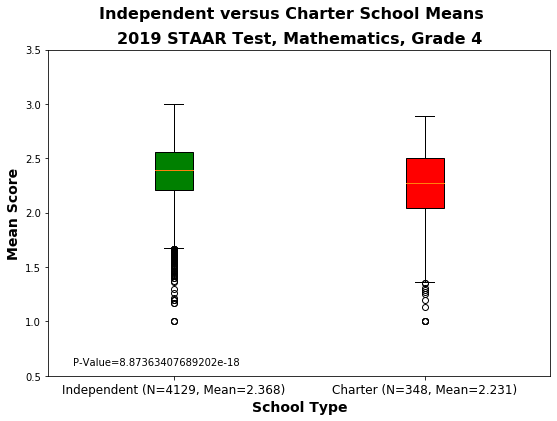

In [43]:
#Boxplot using the I_vector and C_vector generated above.
boxplot_dataI4 = [I_vector4]
boxplot_dataC4 = [C_vector4]


plt.figure(figsize=(9,6))
plt.boxplot(boxplot_dataI4, positions=[1], patch_artist=True, boxprops=dict(facecolor='green'))
plt.boxplot(boxplot_dataC4, positions=[2], patch_artist=True, boxprops=dict(facecolor='red'))


plt.ylim(0.5, 3.5)

plt.suptitle('Independent versus Charter School Means', ha='center', fontsize=16, fontweight='bold')
plt.title('2019 STAAR Test, Mathematics, Grade 4', ha='center', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=14, fontweight='bold')
plt.ylabel('Mean Score', fontsize=14, fontweight='bold')
plt.xticks([1,2],['Independent (N=4129, Mean=2.368)', 'Charter (N=348, Mean=2.231)'], fontsize=12)
plt.text(0.6,0.6,f'P-Value={statp4}')

#Save figure
plt.savefig('../reports/BoxAllStudentsGrade4', dpi=300)

In [44]:
#Import cleaned STAAR data for Grade 5, all students.
grade5all_df = pd.read_csv('../cleandata/AllStudentsGrade5.csv', header=0)
grade5all_df.head(3)

,CAMPUS,DNAME,CNAME,GRADE,District Type,School Site Street Address,School Site City,School Site Zip,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level
0,1902103,CAYUGA ISD,CAYUGA ELEM.,5,INDEPENDENT,17750 N US HWY 287,TENNESSEE COLONY,75861,4.0,44.0,41.0,29.0
1,1903102,ELKHART ISD,ELKHART INTERME,5,INDEPENDENT,301 E PARKER ST,ELKHART,75839-9701,3.0,80.0,65.0,43.0
2,1904102,FRANKSTON ISD,FRANKSTON ELEM.,5,INDEPENDENT,100 PERRY ST,FRANKSTON,75763-0428,7.0,53.0,40.0,26.0


In [45]:
grade5mean_df = grade5all_df[['CNAME', 
                              'District Type',
                              'Below Grade Level',
                              'Approach Grade Level',
                              'Meet Grade Level',
                              'Master Grade Level']]

grade5mean_df.head(3)

,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level
0,CAYUGA ELEM.,INDEPENDENT,4.0,44.0,41.0,29.0
1,ELKHART INTERME,INDEPENDENT,3.0,80.0,65.0,43.0
2,FRANKSTON ELEM.,INDEPENDENT,7.0,53.0,40.0,26.0


In [46]:
grade5mean_df['total'] = grade5mean_df.sum(axis=1)
grade5mean_df.head(3)

C:\Users\StevenJBark\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level,total
0,CAYUGA ELEM.,INDEPENDENT,4.0,44.0,41.0,29.0,118.0
1,ELKHART INTERME,INDEPENDENT,3.0,80.0,65.0,43.0,191.0
2,FRANKSTON ELEM.,INDEPENDENT,7.0,53.0,40.0,26.0,126.0


In [47]:
grade5mean_df['mean'] = (grade5mean_df['Below Grade Level']*1 +
                         grade5mean_df['Approach Grade Level']*2 +
                         grade5mean_df['Meet Grade Level']*3 +
                         grade5mean_df['Master Grade Level']*4) / grade5mean_df['total']

grade5mean_df

C:\Users\StevenJBark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level,total,mean
0,CAYUGA ELEM.,INDEPENDENT,4.0,44.0,41.0,29.0,118.0,2.805085
1,ELKHART INTERME,INDEPENDENT,3.0,80.0,65.0,43.0,191.0,2.774869
2,FRANKSTON ELEM.,INDEPENDENT,7.0,53.0,40.0,26.0,126.0,2.674603
3,NECHES ELEM.,INDEPENDENT,1.0,23.0,15.0,10.0,49.0,2.693878
4,STORY INTERMEDI,INDEPENDENT,58.0,185.0,106.0,51.0,400.0,2.375000
5,WESTWOOD ELEM.,INDEPENDENT,43.0,82.0,38.0,22.0,185.0,2.210811
6,SLOCUM PRE-K -,INDEPENDENT,3.0,20.0,10.0,5.0,38.0,2.447368
7,UNDERWOOD ELEM.,INDEPENDENT,97.0,220.0,134.0,74.0,525.0,2.352381
8,SARAH STRINDEN,CHARTER,5.0,77.0,54.0,35.0,171.0,2.695906
9,W.H. BONNER ELE,INDEPENDENT,7.0,203.0,164.0,121.0,495.0,2.806061


In [48]:
independent5 = grade5mean_df.loc[grade5mean_df['District Type'] == 'INDEPENDENT']
independent5.loc[independent5.isnull().any(axis=1)]

charter5 = grade5mean_df.loc[grade5mean_df['District Type'] == 'CHARTER']
charter5.loc[charter5.isnull().any(axis=1)]

,CNAME,District Type,Below Grade Level,Approach Grade Level,Meet Grade Level,Master Grade Level,total,mean
124,JHW INSPIRE ACA,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
125,JHW INSPIRE ACA,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
817,TRINITY CHARTER,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
819,AZLEWAY - WILLO,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
906,DALLAS COUNTY J,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
907,LETOT CAMPUS,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
911,NOVA ACAD. CEDA,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
1927,COMQUEST ACAD.,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
3867,PATHFINDER CAMP,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN
3868,GEORGE M. KOZME,CHARTER,NaN,NaN,NaN,NaN,0.0,NaN


In [49]:
independent5 = independent5.dropna(how='any')
independent5.isnull().any()

charter5 = charter5.dropna(how='any')
charter5.isnull().any()

CNAME                   False
District Type           False
Below Grade Level       False
Approach Grade Level    False
Meet Grade Level        False
Master Grade Level      False
total                   False
mean                    False
dtype: bool

In [50]:
I_vector5 = []
for index, row in independent5.iterrows():
    I_vector5.append(row[7])

C_vector5 = []
for index, row in charter4.iterrows():
    C_vector5.append(row[7])

In [51]:
[len(I_vector5), len(C_vector5)]

[3875, 348]

In [52]:
(t, statp) = sp.stats.ttest_ind(I_vector5, C_vector5, equal_var=True)
statp5 = statp
statp5

7.901938569773511e-88

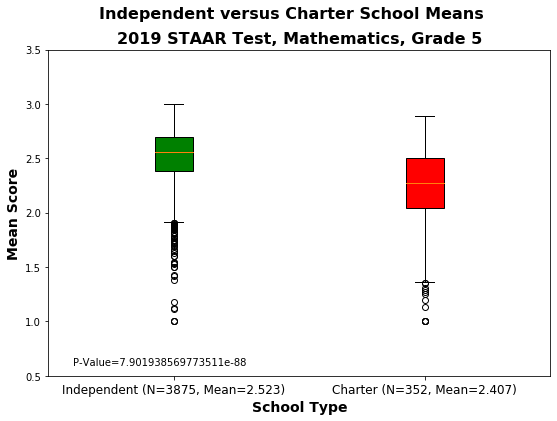

In [53]:
#Boxplot using the I_vector and C_vector generated above.
boxplot_dataI5 = [I_vector5]
boxplot_dataC5 = [C_vector5]

plt.figure(figsize=(9,6))
plt.boxplot(boxplot_dataI5, positions=[1], patch_artist=True, boxprops=dict(facecolor='green'))
plt.boxplot(boxplot_dataC5, positions=[2], patch_artist=True, boxprops=dict(facecolor='red'))


plt.ylim(0.5, 3.5)

plt.suptitle('Independent versus Charter School Means', ha='center', fontsize=16, fontweight='bold')
plt.title('2019 STAAR Test, Mathematics, Grade 5', ha='center', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=14, fontweight='bold')
plt.ylabel('Mean Score', fontsize=14, fontweight='bold')
plt.xticks([1,2],['Independent (N=3875, Mean=2.523)', 'Charter (N=352, Mean=2.407)'], fontsize=12)
plt.text(0.6,0.6,f'P-Value={statp5}')

#Save figure
plt.savefig('../reports/BoxAllStudentsGrade5', dpi=300)